# Data analysis

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import optimize
from scipy import signal

## Basic operations

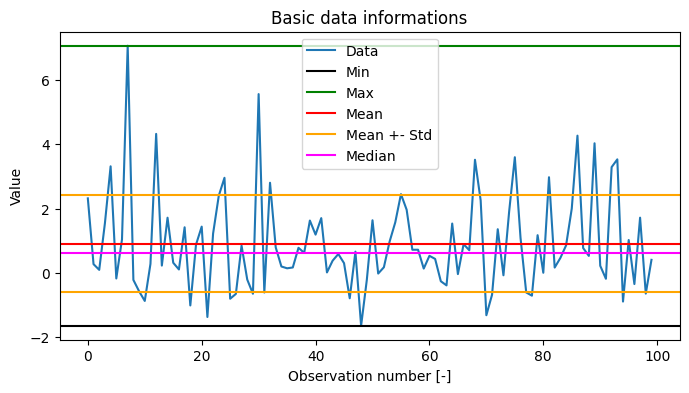

In [2]:
x = np.random.normal(0, 1, 100) + np.random.normal(0, 1, 100) ** 2

plt.figure(figsize=(8, 4))
plt.plot(x, label="Data")
plt.axhline(x.min(), color="black", label="Min")
plt.axhline(x.max(), color="green", label="Max")
plt.axhline(x.mean(), color="red", label="Mean")
plt.axhline(x.mean() + x.std(), color="orange", label="Mean +- Std")
plt.axhline(x.mean() - x.std(), color="orange")
plt.axhline(np.median(x), color="magenta", label="Median")
plt.xlabel("Observation number [-]")
plt.ylabel("Value")
plt.legend()
plt.title("Basic data informations")
plt.show()


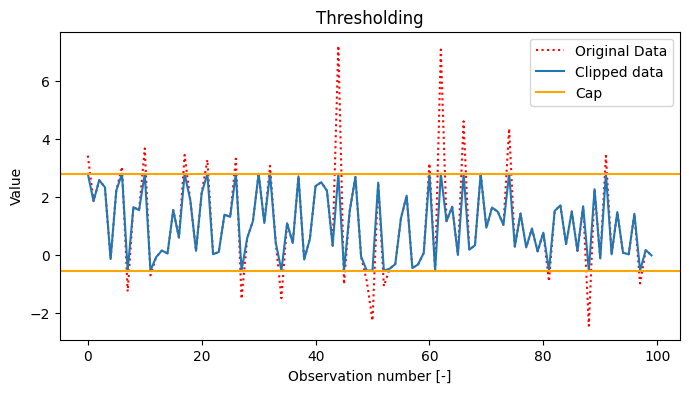

In [3]:
plt.figure(figsize=(8, 4))
x = np.random.normal(0, 1, 100) + np.random.normal(0, 1, 100) ** 2
plt.plot(x, color="red", linestyle="dotted", label="Original Data")

top, bottom = x.mean() + x.std(), x.mean() - x.std()
x[np.where(x >= top)] = top
x[np.where(x <= bottom)] = bottom


plt.plot(x, label="Clipped data")
plt.axhline(top, color="orange", label="Cap")
plt.axhline(bottom, color="orange")
plt.xlabel("Observation number [-]")
plt.ylabel("Value")
plt.legend()
plt.title("Thresholding")
plt.show()
              

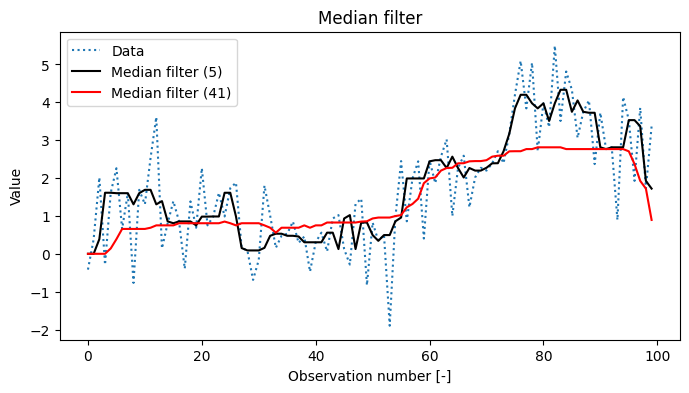

In [4]:
x = np.random.normal(0, 1, 100) + np.linspace(0, 3, 100) + np.sin(np.linspace(0, 10, 100))

plt.figure(figsize=(8, 4))
plt.plot(x, linestyle="dotted", label="Data")
plt.plot(signal.medfilt(x, 5), color="black", label="Median filter (5)")
plt.plot(signal.medfilt(x, 41), color="red", label="Median filter (41)")
plt.xlabel("Observation number [-]")
plt.ylabel("Value")
plt.legend()
plt.title("Median filter")
plt.show()


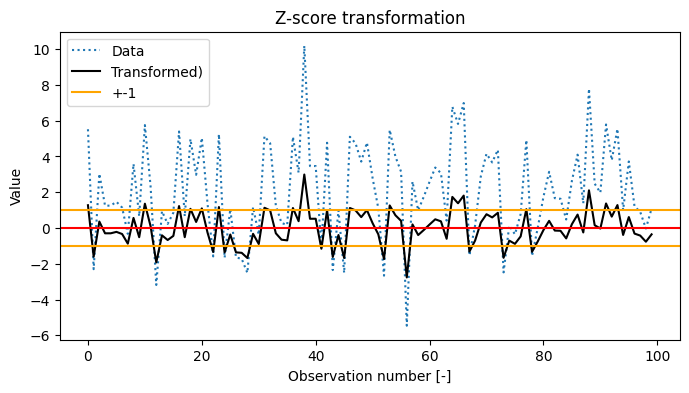

In [5]:
x = np.random.normal(0, 3, 100) + 2

x_centered = x - x.mean()
x_zscored = x_centered / x_centered.std()

plt.figure(figsize=(8, 4))
plt.plot(x, linestyle="dotted", label="Data")
plt.plot(x_zscored, color="black", label="Transformed)")
plt.axhline(1, color="orange", label="+-1")
plt.axhline(0, color="red")
plt.axhline(-1, color="orange", )
plt.xlabel("Observation number [-]")
plt.ylabel("Value")
plt.legend()
plt.title("Z-score transformation")
plt.show()

## Plotting

### Scatter plot

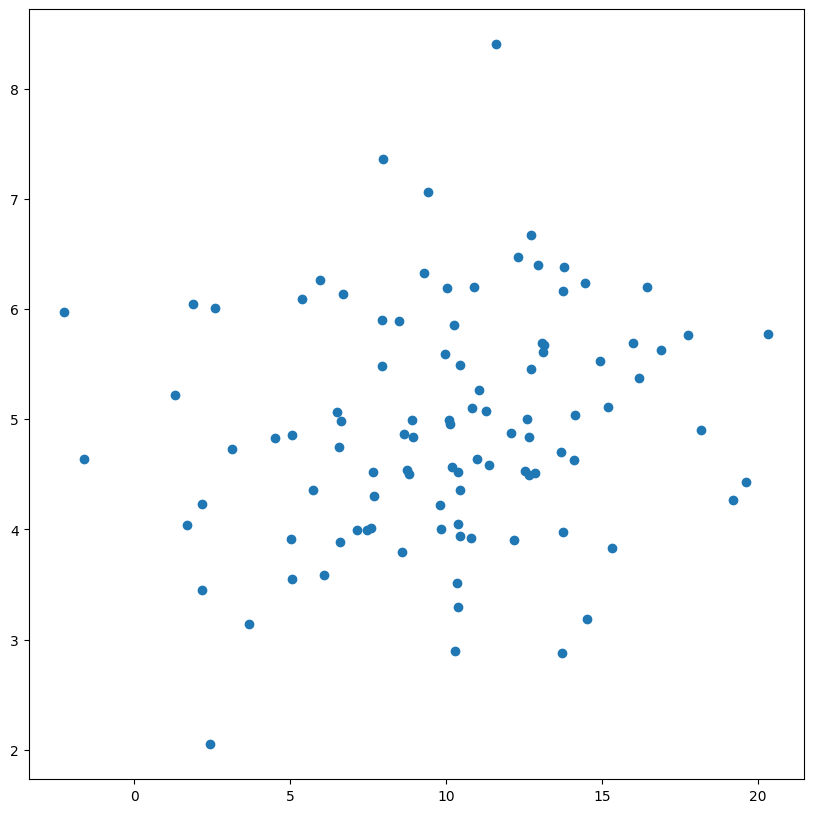

In [6]:
x = np.random.normal((10, 5), (5, 1), (100, 2))

plt.figure(figsize=(10, 10))
plt.plot(x[:,0], x[:,1], marker="o", linestyle = 'None')
plt.show()


### Histogram

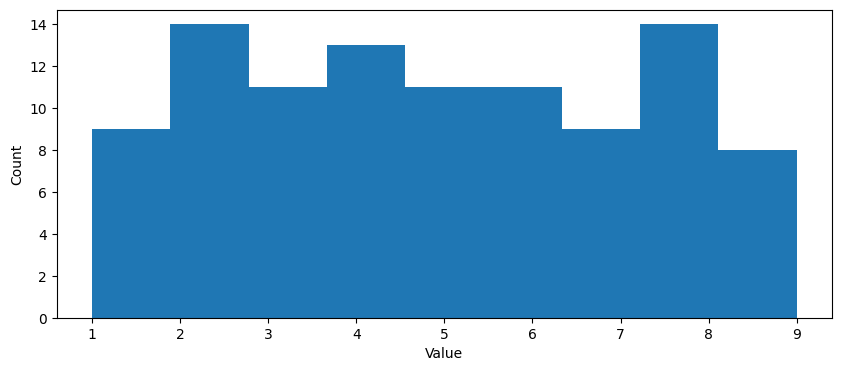

In [7]:
x = np.random.randint(1, 10, 100)

plt.figure(figsize=(10, 4))
plt.hist(x, bins=9)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

### Boxplot

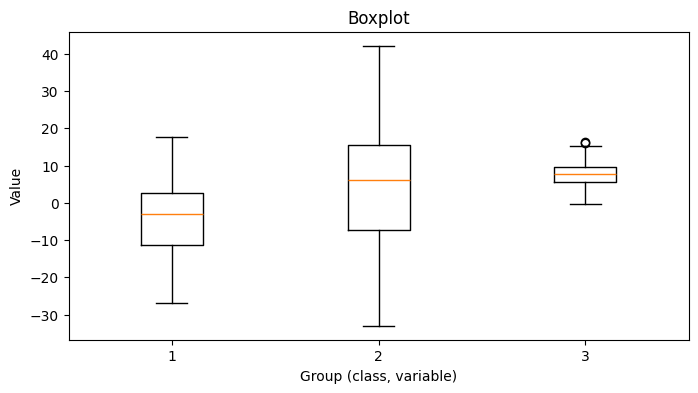

In [8]:
x = [
    np.random.normal(-5, 10, 100),
    np.random.normal(5, 15, 100),
    np.random.normal(8, 3, 100)
]

plt.figure(figsize=(8, 4))
plt.boxplot(x)
plt.title("Boxplot")
plt.xlabel("Group (class, variable)")
plt.ylabel("Value")
plt.show()

## Correlation

* find a lag between two signals via maximum correlation

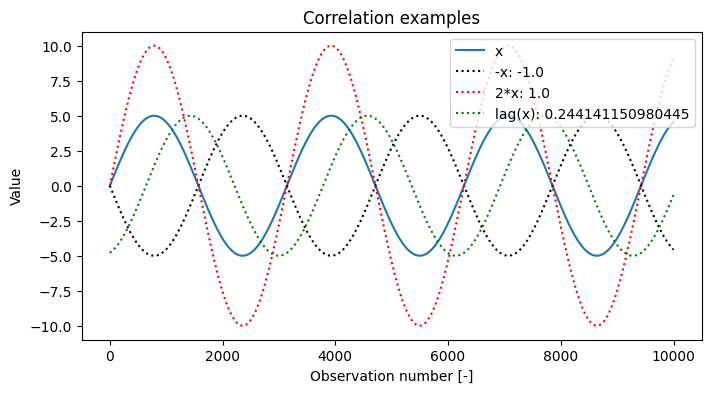

In [9]:
N = 10000
x = 5 * np.sin(np.linspace(0,20,N))
y = 5 * np.sin(np.linspace(5,25,N))

plt.figure(figsize=(8, 4))
plt.plot(x, label="x")
plt.plot(-x, color="black", linestyle="dotted", label=f"-x: {np.corrcoef(x, -x)[0][1]}")
plt.plot(2*x, color="red", linestyle="dotted", label=f"2*x: {np.corrcoef(x, 2*x)[0][1]}")
plt.plot(y, color="green", linestyle="dotted", label=f"lag(x): {np.corrcoef(x, y)[0][1]}")
plt.xlabel("Observation number [-]")
plt.ylabel("Value")
plt.legend()
plt.title("Correlation examples")
plt.show()


## Regression analysis (curve fit)

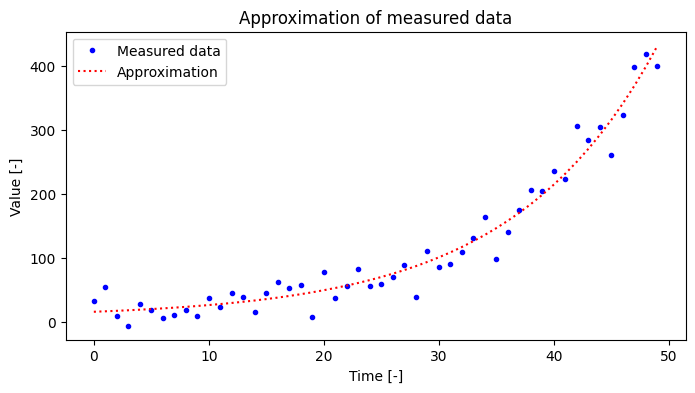

In [10]:
N = 50
x = np.linspace(0, 5, N)
y = 2 + 3 * np.exp(x * 0.8 + 1) + np.random.normal(0, 20, N)

(a, b, c, d), _ = optimize.curve_fit(
        lambda x, a, b, c, d: d + a * np.exp(b * x + c), x, y, p0=(0, 0, 0, 0)) 


yp = d + a * np.exp(b * x + c)

plt.figure(figsize=(8, 4))
plt.plot(y, "b.", label="Measured data")
plt.plot(yp, "r:", label="Approximation")
plt.title("Approximation of measured data")
plt.xlabel("Time [-]")
plt.ylabel("Value [-]")
plt.legend()
plt.show()

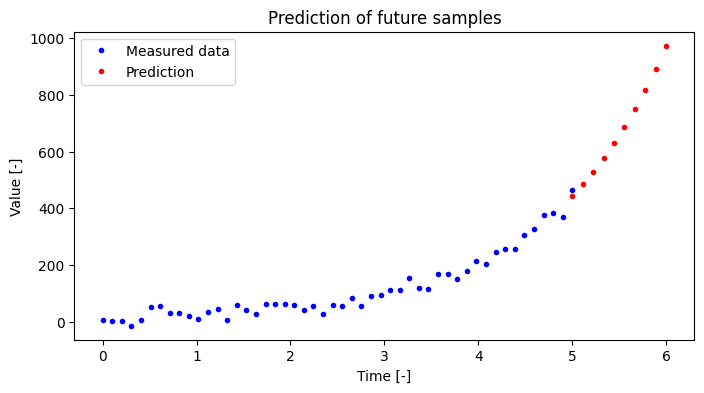

In [11]:
N = 50
x = np.linspace(0, 5, N)
y = 2 + 3 * np.exp(x * 0.8 + 1) + np.random.normal(0, 20, N)

(a, b, c, d), _ = optimize.curve_fit(
        lambda x, a, b, c, d: d + a * np.exp(b * x + c), x, y, p0=(0, 0, 0, 0)) 

xp = np.linspace(5, 6, 10)
yp = d + a * np.exp(b * xp + c)

plt.figure(figsize=(8, 4))
plt.plot(x, y, "b.", label="Measured data")
plt.plot(xp, yp, "r.", label="Prediction")
plt.title("Prediction of future samples")
plt.xlabel("Time [-]")
plt.ylabel("Value [-]")
plt.legend()
plt.show()

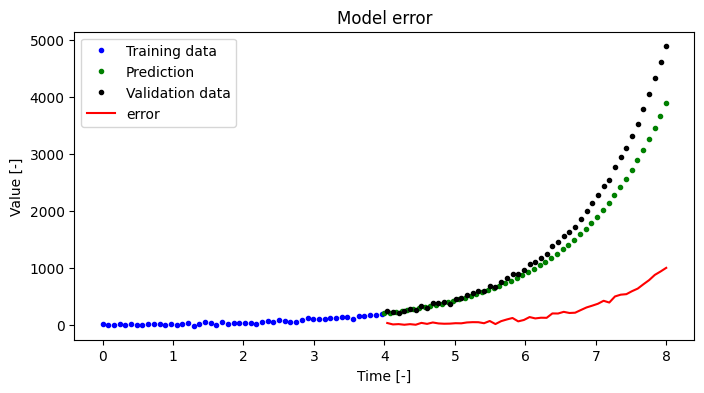

In [12]:
N = 100
x = np.linspace(0, 8, N)
y = 2 + 3 * np.exp(x * 0.8 + 1) + np.random.normal(0, 20, N)

xt, yt = x[:50], y[:50]
xv, yv = x[50:], y[50:]

(a, b, c, d), _ = optimize.curve_fit(
        lambda x, a, b, c, d: d + a * np.exp(b * x + c), xt, yt, p0=(0, 0, 0, 0)) 

xp = np.linspace(4, 8, 50)
yp = d + a * np.exp(b * xp + c)

plt.figure(figsize=(8, 4))
plt.plot(xt, yt, "b.", label="Training data")
plt.plot(xp, yp, "g.", label="Prediction")
plt.plot(xv, yv, "k.", label="Validation data")
plt.plot(xv, np.abs(yv - yp), "r", label="error")
plt.title("Model error")
plt.xlabel("Time [-]")
plt.ylabel("Value [-]")
plt.legend()
plt.show()